# Workflow

Let's try to integrate what we have learned into our workflow. First we need to merge the information from the "in" and "out" tables. However now we need to do it for more than one table, so first we need to recover pairs of tables.

What we could do is simply recover the image file list and then reconstruct the pairs of in and out tables but it is a bit cumbersome. Instead we could just sort our list of exported files. Using the ```natsort``` package, this will give us a natural sorting, with pairs of "in" and "out" files appearing in succession, and the "in" always preceding the "out" file.

Be careful: to employ this sort of "smart" approach, you need to be sure that your folder only contains exactly what you expect. If you want to be sure about what you actually do, just reconstruct the file names!

In [91]:
from pathlib import Path
import natsort
import pandas as pd
import numpy as np

In [92]:
export_dir = Path('../exports/')

In [93]:
export_list = list(export_dir.iterdir())
export_list

[PosixPath('../exports/27985_284_E10_2_out.csv'),
 PosixPath('../exports/36268_404_B8_2_in.csv'),
 PosixPath('../exports/47032_977_G4_4_out.csv'),
 PosixPath('../exports/8346_22_C1_1_out.csv'),
 PosixPath('../exports/27985_284_E10_2_in.csv'),
 PosixPath('../exports/60398_1596_E1_1_out.csv'),
 PosixPath('../exports/27897_273_C8_2_in.csv'),
 PosixPath('../exports/24138_196_F7_2_in.csv'),
 PosixPath('../exports/47549_736_E7_1_in.csv'),
 PosixPath('../exports/46658_784_B12_1_in.csv'),
 PosixPath('../exports/19838_1252_F8_1_in.csv'),
 PosixPath('../exports/46658_784_B12_1_out.csv'),
 PosixPath('../exports/36268_404_B8_2_out.csv'),
 PosixPath('../exports/67703_1283_D7_3_out.csv'),
 PosixPath('../exports/47549_736_E7_1_out.csv'),
 PosixPath('../exports/37367_517_E4_2_in.csv'),
 PosixPath('../exports/50546_727_A8_2_in.csv'),
 PosixPath('../exports/37367_517_E4_2_out.csv'),
 PosixPath('../exports/67703_1283_D7_3_in.csv'),
 PosixPath('../exports/64554_1164_A6_2_in.csv'),
 PosixPath('../exports/5

Note that in this list, we first have to exclude files that are not csv. We can do this using a comprehension list:

In [94]:
export_list = [f for f in export_list if f.suffix=='.csv']

Now we can sort the list:

In [95]:
export_list = natsort.natsorted(export_list)
export_list

[PosixPath('../exports/19838_1252_F8_1_in.csv'),
 PosixPath('../exports/19838_1252_F8_1_out.csv'),
 PosixPath('../exports/24138_196_F7_2_in.csv'),
 PosixPath('../exports/24138_196_F7_2_out.csv'),
 PosixPath('../exports/27897_273_C8_2_in.csv'),
 PosixPath('../exports/27897_273_C8_2_out.csv'),
 PosixPath('../exports/27985_284_E10_2_in.csv'),
 PosixPath('../exports/27985_284_E10_2_out.csv'),
 PosixPath('../exports/36268_404_B8_2_in.csv'),
 PosixPath('../exports/36268_404_B8_2_out.csv'),
 PosixPath('../exports/36268_407_B8_1_in.csv'),
 PosixPath('../exports/36268_407_B8_1_out.csv'),
 PosixPath('../exports/37367_517_E4_2_in.csv'),
 PosixPath('../exports/37367_517_E4_2_out.csv'),
 PosixPath('../exports/46658_784_B12_1_in.csv'),
 PosixPath('../exports/46658_784_B12_1_out.csv'),
 PosixPath('../exports/47032_977_G4_4_in.csv'),
 PosixPath('../exports/47032_977_G4_4_out.csv'),
 PosixPath('../exports/47549_736_E7_1_in.csv'),
 PosixPath('../exports/47549_736_E7_1_out.csv'),
 PosixPath('../exports/5

And we have the expected result!

## Merging information

Now we can do what we did in the previous chapter: load pairs of files and merge them based on the nuclei label. For each pairs of file, we then keep the merged file by adding it to a list ```all_nuclei```. Note that we also keep the file name for reference and add it to each merged table:

In [96]:
all_nuclei = []

for i in np.arange(0, len(export_list), 2):
    
    # Note that we go through the list in steps of 2 and consider item i and i+1
    m_in = pd.read_csv(export_list[i])
    m_out = pd.read_csv(export_list[i+1])
    
    m_in.rename(columns={'mean_intensity': 'intensity_in'}, inplace=True)
    m_out.rename(columns={'mean_intensity': 'intensity_out'}, inplace=True)
    
    nuclei_merged = pd.merge(m_in, m_out, left_on='label', right_on='label', how='inner')
    
    nuclei_merged['filename'] = export_list[i].stem[:-3]
    all_nuclei.append(nuclei_merged)
    
    

Each table contains now the full information:

In [97]:
all_nuclei[3]

,label,area_x,intensity_in,area_y,intensity_out,filename
0,1,1825,68.316712,1422,83.139944,27985_284_E10_2
1,2,27037,70.833118,7267,97.986652,27985_284_E10_2
2,4,28622,83.477220,7947,116.728703,27985_284_E10_2
3,6,24360,82.304762,6906,85.909933,27985_284_E10_2
4,7,22152,62.761060,6659,121.024628,27985_284_E10_2
5,8,26914,64.734599,6440,104.703261,27985_284_E10_2
6,9,27695,94.999097,6894,124.507543,27985_284_E10_2
7,10,34584,72.123092,7076,119.900791,27985_284_E10_2
8,11,51719,69.111680,9116,82.538833,27985_284_E10_2
9,12,2303,79.700825,1499,87.525017,27985_284_E10_2


## Merging tables

We can now merge the tables into one large table by concatenation:

In [98]:
complete_nuclei = pd.concat(all_nuclei)

In [99]:
complete_nuclei.head(5)

,label,area_x,intensity_in,area_y,intensity_out,filename
0,1,5629,28.214070,3675,19.604354,19838_1252_F8_1
1,2,9904,44.429826,4484,27.112400,19838_1252_F8_1
2,4,15070,53.126078,5746,31.962931,19838_1252_F8_1
3,5,20884,49.792856,7425,31.777778,19838_1252_F8_1
4,6,12972,42.911116,3176,28.912154,19838_1252_F8_1


In [100]:
complete_nuclei.shape

(260, 6)

We have in total 260 measured nuclei

## Analysis

We can finally perform the analysis we wanted to do initially: compare the signal inside the nuclei and on their border. For this we can simply create a new column that is the ration between the two intensities:

In [101]:
complete_nuclei['ratio'] = complete_nuclei['intensity_out'] / complete_nuclei['intensity_in']


And finally we can plot a histogram to check whether we actually see two different populations:

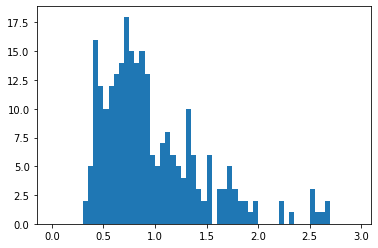

In [102]:
import matplotlib.pyplot as plt

plt.hist(complete_nuclei['ratio'], bins=np.arange(0,3,0.05));

It indeed looks like we have at least two groups of data: some centered around ~0.7 with a membrane depleted of proteins, and a groups above 1 with a stronger signal from the membrane.

## Refining

We know that in each image we have one gene that is tagged. So if we were making a screen, we would like to know in each image if we have membrane enrichment or not. As in our table we have kept the filename, we can now again group by file and compute the mean:

In [103]:
nuclei_grouped = complete_nuclei.groupby('filename').mean().reset_index()

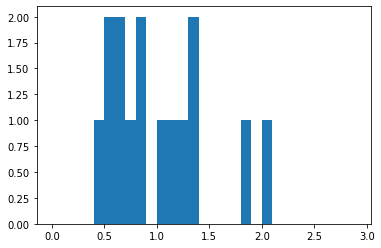

In [104]:
plt.hist(nuclei_grouped['ratio'], bins=np.arange(0,3,0.1));

We have little data, so it's hard to give a definitive answer. However we definitely have two groups: above and below a ration of 1. 

As the data were taken from a databbase with known localization patterns, we can now actually check whether our analysis makes sense. In the ```categories.csv``` table we have the list of files and an indication about membrane enrichment or not. Let's load it:

In [105]:
categories = pd.read_csv('../data/cellaltlas/images/categories.csv')

In [106]:
categories

,filename,in_membrane
0,27985_284_E10_2,True
1,50546_727_A8_2,True
2,8346_22_C1_1,True
3,36268_407_B8_1,True
4,46658_784_B12_1,True
5,27897_273_C8_2,True
6,36268_404_B8_2,True
7,24138_196_F7_2,False
8,67703_1283_D7_3,False
9,47549_736_E7_1,False


What we could do now is to merge our table containing the information grouped by file with this categories table, so that we can then jointly plot ratio and category. For this we can just merge by filename: 

In [107]:
check_table = pd.merge(nuclei_grouped, categories, left_on='filename', right_on='filename', how='inner')

In [108]:
check_table

,filename,label,area_x,intensity_in,area_y,intensity_out,ratio,in_membrane
0,19838_1252_F8_1,6.818182,17970.000000,50.977129,5525.636364,33.289914,0.653682,False
1,24138_196_F7_2,8.230769,38871.000000,53.992013,7602.461538,35.793476,0.657093,False
2,27897_273_C8_2,8.533333,19331.733333,73.610369,5521.666667,130.154140,1.862260,True
3,27985_284_E10_2,7.000000,24721.100000,74.836217,6122.600000,102.396530,1.385374,True
4,36268_404_B8_2,18.105263,14001.526316,73.637664,4386.368421,97.624095,1.386626,True
5,36268_407_B8_1,8.800000,26137.000000,75.580201,7157.133333,88.954313,1.181667,True
6,37367_517_E4_2,10.944444,32703.444444,133.577465,6945.000000,110.737404,0.819614,False
7,46658_784_B12_1,10.000000,26201.588235,50.101048,5851.000000,93.081135,2.020318,True
8,47032_977_G4_4,15.916667,18639.750000,134.740352,5721.250000,77.947376,0.573521,False
9,47549_736_E7_1,11.052632,26338.157895,138.556700,5513.157895,100.344479,0.744908,False


## Seaborn

Now what we would like to do is to plot two histograms: one with only the files characterized as "in_membrane" and the others. We could do that manually with Matplotlib, but we will demonstrate here a simpler solution using the Seaborn library (also based on Matplotlib).

The idea in seaborn, is that we can add additional information in a plot by specifying if data should be for example colors based on some column or be displayed with another symbol etc. In our case we want to create a histogram of the ```ratio``` but in addition we want the data to be split into to colors or ```hue``` based on the ```in_membrane``` column:

In [109]:
import seaborn as sns

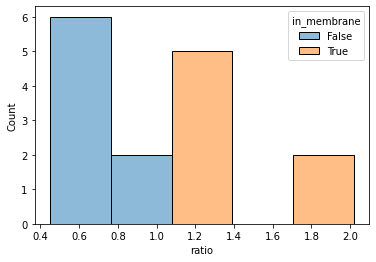

In [110]:
sns.histplot(data=check_table, x='ratio', hue='in_membrane');

And here's the confirmation that our analysis makes sense. All data characterized as ```in_membrane``` indeed have a higher ratio of in/out intensity. We could therefore apply our workflow to new genes with unknown patterns and automatically detect whether they are enriched in the membrane!